In [25]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('concrete_data.csv')

In [6]:
df.head()

,Unnamed: 0,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [15]:
df.drop(df.columns[0], axis=1, inplace=True)

In [16]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [20]:
X = df.drop(df.columns[-1], axis=1)
y = df[[df.columns[-1]]] # df.columns je niz imena kolona, df.columns[-1] je poslednja kolona, df[[kolona1, kolonan]] izdvaja DataFrame koji sadrzi sve redove na vedenih kolona [kolona1, kolonan]

In [21]:
X.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [22]:
y.head()

,"Concrete compressive strength(MPa, megapascals)"
0,79.986111
1,61.887366
2,40.269535
3,41.052780
4,44.296075


In [24]:
X_stats = X.describe()
X_stats

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000


In [27]:
def norm(x):
    stats = x.describe().transpose()
    return (x - stats['mean']) / stats['std']

In [29]:
X_normed = norm(X)
X_normed.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,2.476715,-0.856470,-0.846721,-0.916218,-0.619924,0.862741,-1.217067,-0.279597
1,2.476715,-0.856470,-0.846721,-0.916218,-0.619924,1.055658,-1.217067,-0.279597
2,0.491204,0.795146,-0.846721,2.174311,-1.038440,-0.526258,-2.239824,3.551340
3,0.491204,0.795146,-0.846721,2.174311,-1.038440,-0.526258,-2.239824,5.055221
4,-0.790048,0.678084,-0.846721,0.488568,-1.038440,0.070497,0.647594,4.976069


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_normed, y, test_size=0.2, random_state=42)

In [32]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(32, activation='relu', input_shape=(X_normed.shape[1],)),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001), 
                 loss='mse', metrics=['mse', 'mae'])
    return model

In [33]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(X_train, y_train, epochs=32, validation_split=0.2)

Epoch 1/32
21/21 [==============================] - 1s 7ms/step - loss: 1571.4393 - mse: 1571.4393 - mae: 35.7183 - val_loss: 1535.2954 - val_mse: 1535.2954 - val_mae: 36.0454
Epoch 2/32
21/21 [==============================] - 0s 2ms/step - loss: 1553.8464 - mse: 1553.8464 - mae: 35.4822 - val_loss: 1517.1790 - val_mse: 1517.1790 - val_mae: 35.7991
Epoch 3/32
21/21 [==============================] - 0s 2ms/step - loss: 1531.5551 - mse: 1531.5551 - mae: 35.1765 - val_loss: 1489.7223 - val_mse: 1489.7223 - val_mae: 35.4261
Epoch 4/32
21/21 [==============================] - 0s 2ms/step - loss: 1495.2134 - mse: 1495.2134 - mae: 34.6817 - val_loss: 1445.4144 - val_mse: 1445.4144 - val_mae: 34.8230
Epoch 5/32
21/21 [==============================] - 0s 2ms/step - loss: 1436.0681 - mse: 1436.0681 - mae: 33.8873 - val_loss: 1376.0081 - val_mse: 1376.0081 - val_mae: 33.8689
Epoch 6/32
21/21 [==============================] - 0s 2ms/step - loss: 1350.9329 - mse: 1350.9329 - mae: 32.7006 - val_

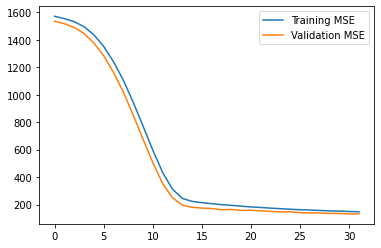

In [36]:
plt.plot(history.epoch, history.history['mse'])
plt.plot(history.epoch, history.history['val_mse'])
plt.legend(['Training MSE', 'Validation MSE'])
plt.show()

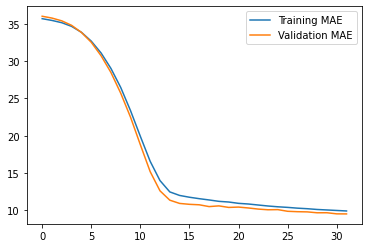

In [37]:
plt.plot(history.epoch, history.history['mae'])
plt.plot(history.epoch, history.history['val_mae'])
plt.legend(['Training MAE', 'Validation MAE'])
plt.show()

# Za vezbu:
Smanjti MSE i MAE:
1. Slozenijim/Prostijim modelom
2. Vecim brojem epoha za treniranje
3. Izbacivanjem nekih kolona

Dodati da se treniranje zaustavi ukoliko se `mse` i `val_mse` ne menja previse u 20 uzastopnih iteracija.